<a href="https://colab.research.google.com/github/niladri-rkmvu/dsa-2025/blob/12.graphs/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph ADT

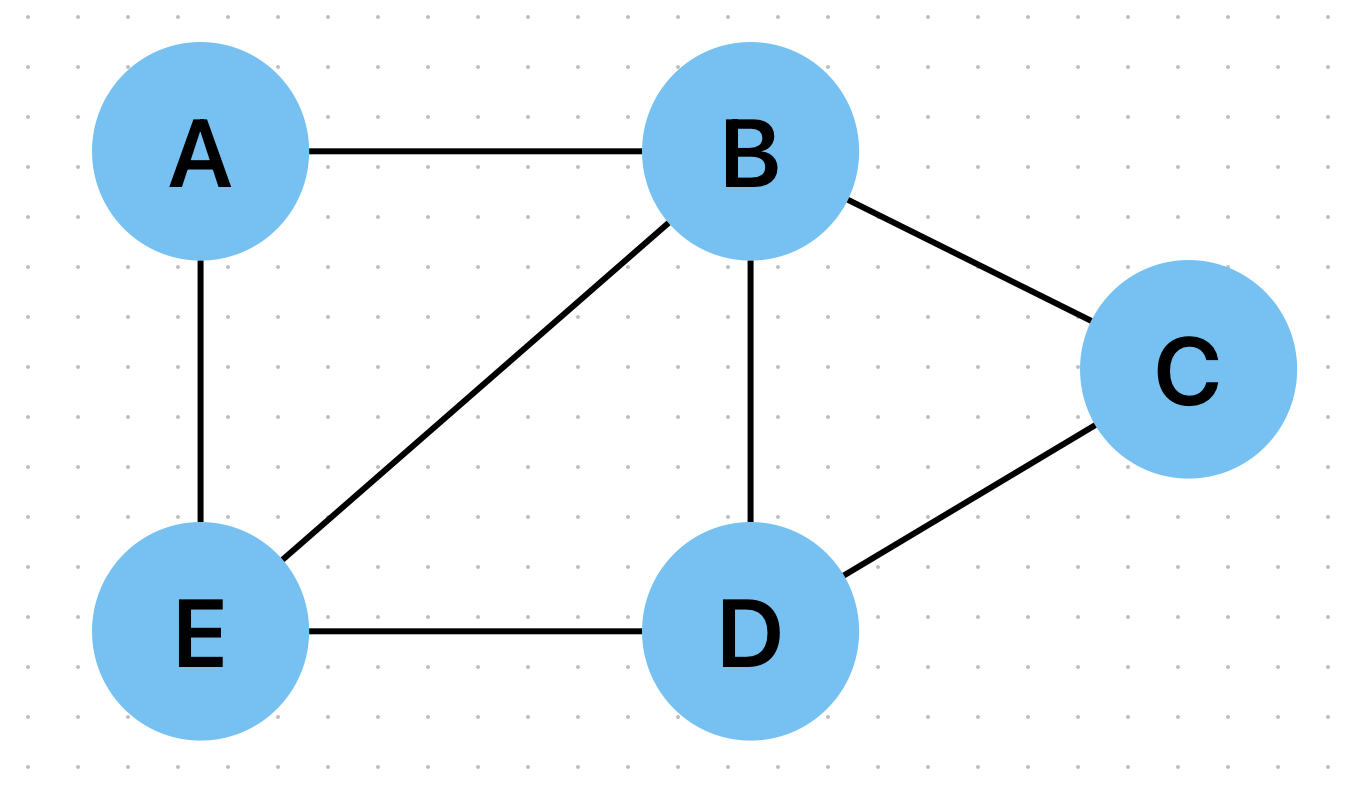



```
A : ['B', 'E']
B : ['A', 'D', 'E', 'C']
C : ['B', 'D']
D : ['B', 'C', 'E', 'A', 'D']
E : ['A', 'B', 'D']
```



In [ ]:
class Graph:
    def __init__(self):
        self.adj_list = {}

    def print_graph(self):
        print("-----------")
        print(f"printing graph")
        print("----------- ")
        for vertex in self.adj_list:
            print(vertex, ":", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list:
            self.adj_list[vertex] = []
            return True
        else:
            print(f"Vertex {vertex} already exists")
            return False

    def add_vertices(self, vertices):
        for vertex in vertices:
            if vertex not in self.adj_list:
                self.adj_list[vertex] = []
            else:
                print(f"Vertex {vertex} already exists")
        return True

    def add_edge(self, v1, v2):
        if v1 in self.adj_list and v2 in self.adj_list:
            if v2 not in self.adj_list[v1]:
                self.adj_list[v1].append(v2)
            if v1 not in self.adj_list[v2]:
                self.adj_list[v2].append(v1)
            return True
        else:
            print(f"Cannot add edge, one or both vertices {v1}, {v2} do not exist")
            return False

    def remove_edge(self, v1, v2):
        if v1 not in self.adj_list or v2 not in self.adj_list:
            print(f"Cannot remove edge, one or both vertices {v1}, {v2} do not exist")
            return False

        if v2 in self.adj_list[v1]:
            self.adj_list[v1].remove(v2)
        if v1 in self.adj_list[v2]:
            self.adj_list[v2].remove(v1)
        return True

    def remove_vertex(self, vertex):
        if vertex not in self.adj_list:
            print(f"Vertex {vertex} does not exist")
            return False

        # iterate over a copy to avoid modification issues
        for other_vertex in list(self.adj_list[vertex]):
            self.adj_list[other_vertex].remove(vertex)

        del self.adj_list[vertex]
        return True


# Driver code
if __name__ == "__main__":
    g = Graph()

    print("=== Adding vertices ===")
    g.add_vertex('A')
    g.add_vertex('B')
    g.add_vertex('C')
    g.add_vertex('D')
    g.add_vertex('E')
    g.print_graph()

    print("\n=== Adding edges ===")
    g.add_edge('A','B')
    g.add_edge('A','E')

    g.add_edge('B','A')
    g.add_edge('B','D')
    g.add_edge('B','E')
    g.add_edge('B','C')

    g.add_edge('C','B')
    g.add_edge('C','D')

    g.add_edge('D','B')
    g.add_edge('D','C')
    g.add_edge('D','E')
    g.print_graph()

    print("\n=== Removing edges ===")
    g.remove_edge('A','E')   # valid removal
    g.print_graph()

    print("\n=== Removing vertices ===")
    g.remove_vertex('C')   # valid removal
    g.print_graph()

=== Adding vertices ===
-----------
printing graph
----------- 
A : []
B : []
C : []
D : []
E : []

=== Adding edges ===
-----------
printing graph
----------- 
A : ['B', 'E']
B : ['A', 'D', 'E', 'C']
C : ['B', 'D']
D : ['B', 'C', 'E']
E : ['A', 'B', 'D']

=== Removing edges ===
-----------
printing graph
----------- 
A : ['B']
B : ['A', 'D', 'E', 'C']
C : ['B', 'D']
D : ['B', 'C', 'E']
E : ['B', 'D']

=== Removing vertices ===
-----------
printing graph
----------- 
A : ['B']
B : ['A', 'D', 'E']
D : ['B', 'E']
E : ['B', 'D']


# Graph Traversals = BFS, DFS

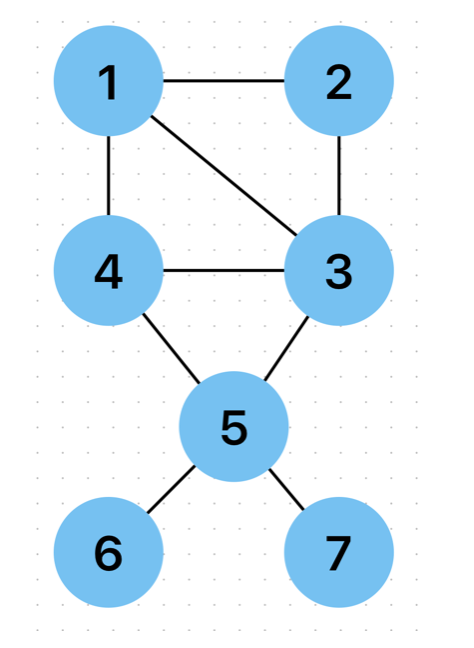

In [ ]:
from collections import deque

class Graph:
    def __init__(self):
        self.adj_list = {}

    def print_graph(self):
        print("-----------")
        print("printing graph")
        print("----------- ")
        for vertex in self.adj_list:
            print(vertex, ":", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list:
            self.adj_list[vertex] = []
            return True
        else:
            # print(f"Vertex {vertex} already exists")
            return False

    def add_vertices(self, vertices):
        for vertex in vertices:
            if vertex not in self.adj_list:
                self.adj_list[vertex] = []
        return True

    def add_edge(self, v1, v2):
        if v1 in self.adj_list and v2 in self.adj_list:
            if v2 not in self.adj_list[v1]:
                self.adj_list[v1].append(v2)
            if v1 not in self.adj_list[v2]:
                self.adj_list[v2].append(v1)
            return True
        else:
            # print(f"Cannot add edge, one or both vertices {v1}, {v2} do not exist")
            return False

    def remove_edge(self, v1, v2):
        if v1 not in self.adj_list or v2 not in self.adj_list:
            # print(f"Cannot remove edge, one or both vertices {v1}, {v2} do not exist")
            return False

        if v2 in self.adj_list[v1]:
            self.adj_list[v1].remove(v2)
        if v1 in self.adj_list[v2]:
            self.adj_list[v2].remove(v1)
        return True

    def remove_vertex(self, vertex):
        if vertex not in self.adj_list:
            # print(f"Vertex {vertex} does not exist")
            return False

        for other_vertex in list(self.adj_list[vertex]):
            self.adj_list[other_vertex].remove(vertex)

        del self.adj_list[vertex]
        return True

    # BFS logic using queue
    def bfs(self, start_vertex):
        if start_vertex not in self.adj_list:
            print(f"Start vertex {start_vertex} does not exist")
            return []

        explored = set([start_vertex])
        queue = deque([start_vertex])
        traversal_order = []

        while queue:
            current = queue.popleft()
            traversal_order.append(current)   # add when dequeued
            for neighbor in self.adj_list[current]:
                if neighbor not in explored:
                    explored.add(neighbor)
                    queue.append(neighbor)
        return traversal_order

    # Iterative DFS using stack
    # Student exercise
    def dfs_iterative(self, start_vertex):
        if start_vertex not in self.adj_list:
            print(f"Start vertex {start_vertex} does not exist")
            return []

        visited = set()
        stack = [start_vertex]
        traversal_order = []

        while stack:
            current = stack.pop()
            if current not in visited:
                visited.add(current)
                traversal_order.append(current)

                for neighbor in self.adj_list[current]:
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal_order

    # Recursive DFS
    def dfs_recursive(self, start_vertex):
        visited = set()
        traversal_order = []

        def dfs(v):
            visited.add(v)
            traversal_order.append(v)
            for neighbor in self.adj_list[v]:
                if neighbor not in visited:
                    dfs(neighbor)

        if start_vertex not in self.adj_list:
            print(f"Start vertex {start_vertex} does not exist")
            return []
        dfs(start_vertex)
        return traversal_order

if __name__ == "__main__":
    g = Graph()
    vertex_edge_dict = {
                1 : [2, 3, 4],
                2 : [1, 3],
                3 : [1, 2, 4, 5],
                4 : [1, 3, 5],
                5 : [3, 4, 6, 7],
                6 : [5],
                7 : [5]
    }
    for vertex, edges in vertex_edge_dict.items():
        g.add_vertex(vertex)
        for edge in edges:
            g.add_edge(vertex, edge)
    g.add_vertices([1,2,3,4,5])
    g.print_graph()

    print("\n=== BFS Traversal from vertex 1 ===")
    print(g.bfs(1))   # Expected: [1, 2, 3, 4, 5, 6, 7] <-- 1 possibility

    print("\n=== BFS Traversal from vertex 7 ===")
    print(g.bfs(7))   # Expected: [7, 5, 3, 4, 6, 1, 2] <-- 1 possibility

    print("\n=== DFS Recursive Traversal from vertex 1 ===")
    print(g.dfs_recursive(1))   # One possible order: [1, 2, 3, 4, 5, 6, 7]

    print("\n=== DFS Iterative Traversal from vertex 1 ===")
    print(g.dfs_iterative(1))   # One possible order: [1, 2, 3, 4, 5, 6, 7]

    print("\n=== DFS Recursive Traversal from vertex 7 ===")
    print(g.dfs_recursive(7))   # One possible order: [7, 5, 3, 1, 2, 4, 6]

    print("\n=== DFS Iterative Traversal from vertex 7 ===")
    print(g.dfs_iterative(7))   # One possible order: [7, 5, 3, 1, 2, 4, 6]


-----------
printing graph
----------- 
1 : [2, 3, 4]
2 : [1, 3]
3 : [1, 2, 4, 5]
4 : [1, 3, 5]
5 : [3, 4, 6, 7]
6 : [5]
7 : [5]

=== BFS Traversal from vertex 1 ===
[1, 2, 3, 4, 5, 6, 7]

=== BFS Traversal from vertex 7 ===
[7, 5, 3, 4, 6, 1, 2]

=== DFS Recursive Traversal from vertex 1 ===
[1, 2, 3, 4, 5, 6, 7]

=== DFS Iterative Traversal from vertex 1 ===
[1, 4, 5, 7, 6, 3, 2]

=== DFS Recursive Traversal from vertex 7 ===
[7, 5, 3, 1, 2, 4, 6]

=== DFS Iterative Traversal from vertex 7 ===
[7, 5, 6, 4, 3, 2, 1]


# Spanning Trees

Total spanning trees: 16


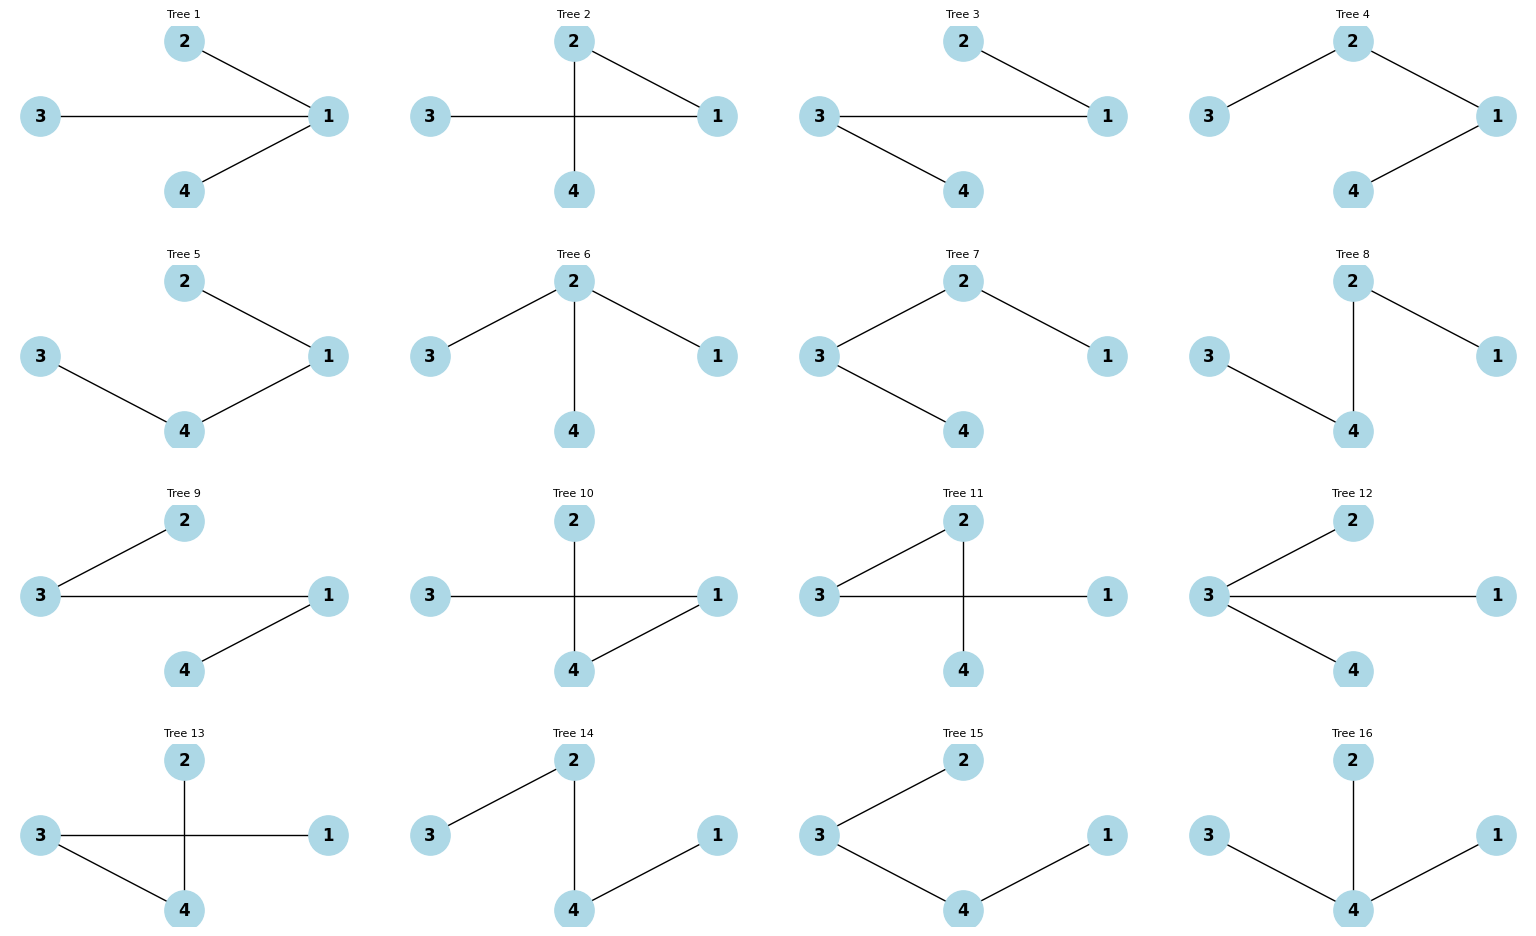

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def all_spanning_trees(G):
    n = G.number_of_nodes()
    spanning_trees = []
    for edges in combinations(G.edges(), n-1):
        T = nx.Graph()
        T.add_nodes_from(G.nodes())
        T.add_edges_from(edges)
        if nx.is_tree(T):
            spanning_trees.append(T)
    return spanning_trees

def visualize_spanning_trees(G):
    trees = all_spanning_trees(G)
    n = len(trees)
    cols = 4
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(16, 10))  # bigger canvas

    for i, T in enumerate(trees, 1):
        plt.subplot(rows, cols, i)
        # Option 1: circular layout (no overlap)
        pos = nx.circular_layout(T)
        # Option 2: spring layout with more spacing
        # pos = nx.spring_layout(T, seed=i, k=0.8)  # k controls spacing

        nx.draw(
            T, pos,
            with_labels=True,
            node_color="lightblue",
            node_size=800,
            font_weight="bold",
            edge_color="black"
        )
        plt.title(f"Tree {i}", fontsize=8)

    plt.tight_layout(pad=3.0)  # extra padding between subplots
    plt.show()

if __name__ == "__main__":
    G = nx.complete_graph([1, 2, 3, 4])
    trees = all_spanning_trees(G)
    print(f"Total spanning trees: {len(trees)}")
    visualize_spanning_trees(G)